## Load libraries

In [2]:
# tensorflow backend
print('tensorflow backend')
from os import environ
environ['KERAS_BACKEND'] = 'tensorflow'
# vae stuff
print('vae stuff')
from chemvae.vae_utils import VAEUtils
from chemvae import mol_utils as mu
# import scientific py
print('iport scientific py')
import numpy as np
import pandas as pd
# rdkit stuff
print('rdkit stuff')
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import PandasTools
# plotting stuff
print('plotting stuff')
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import SVG, display
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
import numpy as np 

import pandas as pd

tensorflow backend
vae stuff


Using TensorFlow backend.
C:\Users\PC\.conda\envs\01_chemvae\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\PC\.conda\envs\01_chemvae\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\PC\.conda\envs\01_chemvae\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\PC\.conda\envs\01_chemvae\lib\site-packag

iport scientific py
rdkit stuff
plotting stuff


## Load a model

In [3]:
vae = VAEUtils(directory='models/zinc_properties')

From C:\Users\PC\.conda\envs\01_chemvae\lib\site-packages\keras\backend\tensorflow_backend.py:1210: calling reduce_prod (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
C:\Users\PC\.conda\envs\01_chemvae\lib\site-packages\keras\models.py:245: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
From C:\Users\PC\.conda\envs\01_chemvae\lib\site-packages\keras\backend\tensorflow_backend.py:1192: calling reduce_sum (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
From C:\Users\PC\.conda\envs\01_chemvae\lib\site-packages\keras\backend\tensorflow_backend.py:1156: calling reduce_max (from tensorflow.python.ops.mat

Using standarized functions? True
Standarization: estimating mu and std values ...done!


## Load smiles

In [4]:

smiles_group = []
is_count = 0
is_not_count = 0
df = pd.read_csv('./ask1_smiles.csv')
df.drop(['index'], axis=1, inplace=True)
for i in range(len(df)):
    if(df.loc[i, 'smiles'].find('.') == -1 and df.loc[i, 'smiles'].find('i') == -1):
        is_not_count += 1
        smiles_group.append([df.loc[i, 'smiles'], df.loc[i, 'activation']])
    else:
        is_count += 1

print('molcule fetched :', len(df))
print('invalid molecule detected :', is_count)
print('valid molecule detected :', is_not_count)

molcule fetched : 21909
invalid molecule detected : 3155
valid molecule detected : 18754


## Decode latent space / fingerprint

In [24]:
# bytes to bits
def access_bit(data, num):
    base = int(num // 8)
    shift = int(num % 8)
    return (data[base] & (1<<shift)) >> shift

def smiles_to_vect(smiles_group):
    smiles_list = [ mu.canon_smiles(data[0]) for data in smiles_group ]

    # latent spcae
    print('(1/5) encoding latent space...')
    Xs = [ (vae.smiles_to_hot(smiles, canonize_smiles=True)) for smiles in smiles_list ]
    Zs = [ list(vae.encode(X)[0]) for X in Xs ]
    latent_group.extend(list(zip(Zs, [ data[1] for data in smiles_group ])))
    
    # mols = [ Chem.MolFromSmiles(smiles) for smiles in smiles_list ]

    # # rdk fp
    # print('\r(2/5) encoding rdk fp...')
    # fps = [ Chem.RDKFingerprint(mol) for mol in mols ]
    # fpBits = [ [ int(char) for char in fp.ToBitString() ] for fp in fps ]
    # rdk_fp_group.extend(list(zip(fpBits, [ data[1] for data in smiles_group ])))

    # # pattern fp
    # print('\r(3/5) encoding pattern fp...')
    # fps = [ Chem.PatternFingerprint(mol) for mol in mols ]
    # fpBits = [ [ int(char) for char in fp.ToBitString() ] for fp in fps ]
    # pattern_fp_group.extend(list(zip(fpBits, [ data[1] for data in smiles_group ])))

    # # layered fp
    # print('\r(4/5) encoding layered fp...')
    # fps = [ Chem.LayeredFingerprint(mol) for mol in mols ]
    # fpBits = [ [ int(char) for char in fp.ToBitString() ] for fp in fps ]
    # layered_fp_group.extend(list(zip(fpBits, [ data[1] for data in smiles_group ])))

    # # MACCSKeys fp
    # print('\r(5/5) encoding layered fp...')
    # fps = [ Chem.GetMACCSKeysFingerprint(mol) for mol in mols ]
    # fpBits = [ [ int(char) for char in fp.ToBitString() ] for fp in fps ]
    # MACCSKeys_fp_group.extend(list(zip(fpBits, [ data[1] for data in smiles_group ])))

## Convert smiles to coordinates

In [25]:
latent_group = []
rdk_fp_group = []
pattern_fp_group = []
layered_fp_group = []
MACCSKeys_fp_group = []
smiles_to_vect(smiles_group)

(1/5) encoding latent space...


## Save latent/fingerprint data

In [26]:
df = pd.DataFrame(latent_group)
df.to_csv('./data/latent_group.csv')

# df = pd.DataFrame(rdk_fp_group)
# df.to_csv('./data/rdk_fp_group.csv')

# df = pd.DataFrame(pattern_fp_group)
# df.to_csv('./data/pattern_fp_group.csv')

# df = pd.DataFrame(layered_fp_group)
# df.to_csv('./data/layered_fp_group.csv')

# df = pd.DataFrame(MACCSKeys_fp_group)
# df.to_csv('./data/MACCKeys_fp_group.csv')

# take about 60s.

## Load latent/fingerprint data

In [5]:
print('(1/5) fetching latent space group...')
latent_group = []
df = pd.read_csv('./data/latent_group.csv')
df.drop(['0'], axis=1, inplace=True)
for i in range(len(df)):
    points = list(map(float, df.loc[i, '1'].strip('[]').split(', ')))
    latent_group.append([points, df.loc[i, '2']])

print('(2/5) fetching rdk fp group...')
rdk_fp_group = []
df = pd.read_csv('./data/rdk_fp_group.csv')
df.drop(['0'], axis=1, inplace=True)
for i in range(len(df)):
    points = list(map(int, df.loc[i, '1'].strip('[]').split(', ')))
    rdk_fp_group.append([points, df.loc[i, '2']])

print('(3/5) fetching pattern fp group...')
pattern_fp_group = []
df = pd.read_csv('./data/pattern_fp_group.csv')
df.drop(['0'], axis=1, inplace=True)
for i in range(len(df)):
    points = list(map(float, df.loc[i, '1'].strip('[]').split(', ')))
    pattern_fp_group.append([points, df.loc[i, '2']])

print('(4/5) fetching layered fp group...')
layered_fp_group = []
df = pd.read_csv('./data/layered_fp_group.csv')
df.drop(['0'], axis=1, inplace=True)
for i in range(len(df)):
    points = list(map(float, df.loc[i, '1'].strip('[]').split(', ')))
    layered_fp_group.append([points, df.loc[i, '2']])

print('(5/5) fetching MACCSKeys fp group...')
MACCSKeys_fp_group = []
df = pd.read_csv('./data/MACCSKeys_fp_group.csv')
df.drop(['0'], axis=1, inplace=True)
for i in range(len(df)):
    points = list(map(float, df.loc[i, '1'].strip('[]').split(', ')))
    MACCSKeys_fp_group.append([points, df.loc[i, '2']])

(1/5) fetching latent space group...
(2/5) fetching rdk fp group...
(3/5) fetching pattern fp group...
(4/5) fetching layered fp group...
(5/5) fetching MACCSKeys fp group...


## Build DimReduction Model

In [6]:
n_components = 2
model_pca = PCA(n_components=n_components)
model_tsne = TSNE(n_components=n_components)

In [7]:
print(len(latent_group))
print(len([ points[0] for points in latent_group ]))

18754
18754


In [10]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 5454881247543529717]

## Train and Save DimReduction Model

In [29]:
# print('\r(1/10) {:30s}'.format('training latent tsne...'))
# points_latent_tsne = model_tsne.fit_transform([ points[0] for points in latent_group ])
# df = pd.DataFrame(points_latent_tsne)
# df.to_csv('./data/points_latent_tsne.csv')

# print('\r(2/10) {:30s}'.format('training latent pca...'))
# points_latent_pca = model_pca.fit_transform([ points[0] for points in latent_group ])
# df = pd.DataFrame(points_latent_pca)
# df.to_csv('./data/points_latent_pca.csv')

# print('\r(3/10) {:30s}'.format('training rdk fingerprint tsne...'))
# points_rdk_fp_tsne = model_tsne.fit_transform([ points[0] for points in rdk_fp_group ])
# df = pd.DataFrame(points_rdk_fp_tsne)
# df.to_csv('./data/points_rdk_fp_tsne.csv')


# print('\r(4/10) {:30s}'.format('training rdk fingerprint pca...'))
# points_rdk_fp_pca = model_pca.fit_transform([ points[0] for points in rdk_fp_group ])
# df = pd.DataFrame(points_rdk_fp_pca)
# df.to_csv('./data/points_rdk_fp_pca.csv')

# print('\r(5/10) {:30s}'.format('training pattern fingerprint tsne...'))
# points_pattern_fp_tsne = model_tsne.fit_transform([ points[0] for points in pattern_fp_group ])
# df = pd.DataFrame(points_pattern_fp_tsne)
# df.to_csv('./data/points_pattern_fp_tsne.csv')

print('\r(6/10) {:30s}'.format('training pattern fingerprint pca...'))
points_pattern_fp_pca = model_pca.fit_transform([ points[0] for points in pattern_fp_group ])
df = pd.DataFrame(points_pattern_fp_pca)
df.to_csv('./data/points_pattern_fp_pca.csv')

print('\r(7/10) {:30s}'.format('training layered fingerprint tsne...'))
points_layered_fp_tsne = model_tsne.fit_transform([ points[0] for points in layered_fp_group ])
df = pd.DataFrame(points_layered_fp_tsne)
df.to_csv('./data/points_layered_fp_tsne.csv')

print('\r(8/10) {:30s}'.format('training layered fingerprint pca...'))
points_layered_fp_pca = model_pca.fit_transform([ points[0] for points in layered_fp_group ])
df = pd.DataFrame(points_layered_fp_pca)
df.to_csv('./data/points_layered_fp_pca.csv')

print('\r(9/10) {:30s}'.format('training MACCSKeys fingerprint tsne...'))
points_MACCSKeys_fp_tsne = model_pca.fit_transform([ points[0] for points in MACCSKeys_fp_group ])
df = pd.DataFrame(points_MACCSKeys_fp_tsne)
df.to_csv('./data/points_MACCSKeys_fp_tsne.csv')

print('\r(10/10) {:30s}'.format('training MACCSKeys fingerprint pca...'))
points_MACCSKeys_fp_pca = model_pca.fit_transform([ points[0] for points in MACCSKeys_fp_group ])
df = pd.DataFrame(points_MACCSKeys_fp_pca)
df.to_csv('./data/points_MACCSKeys_fp_pca.csv')


# takes about 1200s.

(6/10) training pattern fingerprint pca...


NameError: name 'sd' is not defined

## Load coordinates

In [36]:
print('(1/10) fetching latent space tsne points...')
points_latent_tsne = []
df = pd.read_csv('./data/points_latent_tsne.csv')
for i in range(len(df)):\
    points_latent_tsne.append(list(map(float, [df.loc[i, '0'], df.loc[i, '1']])))

print('(2/10) fetching latent space pca points...')
points_latent_pca = []
df = pd.read_csv('./data/points_latent_pca.csv')
for i in range(len(df)):
    points_latent_pca.append(list(map(float, [df.loc[i, '0'], df.loc[i, '1']])))

print('(3/10) fetching rdk fingerprint tsne points...')
points_rdk_fp_tsne = []
df = pd.read_csv('./data/points_rdk_fp_tsne.csv')
for i in range(len(df)):
    points_rdk_fp_tsne.append(list(map(float, [df.loc[i, '0'], df.loc[i, '1']])))
    
print('(4/10) fetching rdk fingerprint pca points...')
points_rdk_fp_pca = []
df = pd.read_csv('./data/points_rdk_fp_pca.csv')
for i in range(len(df)):
    points_rdk_fp_pca.append(list(map(float, [df.loc[i, '0'], df.loc[i, '1']])))

print('(5/10) fetching pattern fingerprint tsne points...')
points_pattern_fp_tsne = []
df = pd.read_csv('./data/points_pattern_fp_tsne.csv')
for i in range(len(df)):
    points_pattern_fp_tsne.append(list(map(float, [df.loc[i, '0'], df.loc[i, '1']])))
    
print('(6/10) fetching pattern fingerprint pca points...')
points_pattern_fp_pca = []
df = pd.read_csv('./data/points_pattern_fp_pca.csv')
for i in range(len(df)):
    points_pattern_fp_pca.append(list(map(float, [df.loc[i, '0'], df.loc[i, '1']])))

print('(7/10) fetching layered fingerprint tsne points...')
points_layered_fp_tsne = []
df = pd.read_csv('./data/points_layered_fp_tsne.csv')
for i in range(len(df)):
    points_layered_fp_tsne.append(list(map(float, [df.loc[i, '0'], df.loc[i, '1']])))
    
print('(8/10) fetching layered fingerprint pca points...')
points_layered_fp_pca = []
df = pd.read_csv('./data/points_layered_fp_pca.csv')
for i in range(len(df)):
    points_layered_fp_pca.append(list(map(float, [df.loc[i, '0'], df.loc[i, '1']])))

print('(9/10) fetching MACCSKeys fingerprint tsne points...')
points_MACCSKeys_fp_tsne = []
df = pd.read_csv('./data/points_MACCSKeys_fp_tsne.csv')
for i in range(len(df)):
    points_MACCSKeys_fp_tsne.append(list(map(float, [df.loc[i, '0'], df.loc[i, '1']])))
    
print('(10/10) fetching MACCSKeys fingerprint pca points...')
points_MACCSKeys_fp_pca = []
df = pd.read_csv('./data/points_MACCSKeys_fp_pca.csv')
for i in range(len(df)):
    points_MACCSKeys_fp_pca.append(list(map(float, [df.loc[i, '0'], df.loc[i, '1']])))

(1/10) fetching latent space tsne points...
(2/10) fetching latent space pca points...
(3/10) fetching rdk fingerprint tsne points...
(4/10) fetching rdk fingerprint pca points...
(5/10) fetching pattern fingerprint tsne points...
(6/10) fetching pattern fingerprint pca points...
(7/10) fetching layered fingerprint tsne points...
(8/10) fetching layered fingerprint pca points...
(9/10) fetching MACCSKeys fingerprint tsne points...
(10/10) fetching MACCSKeys fingerprint pca points...


## Visualize the data

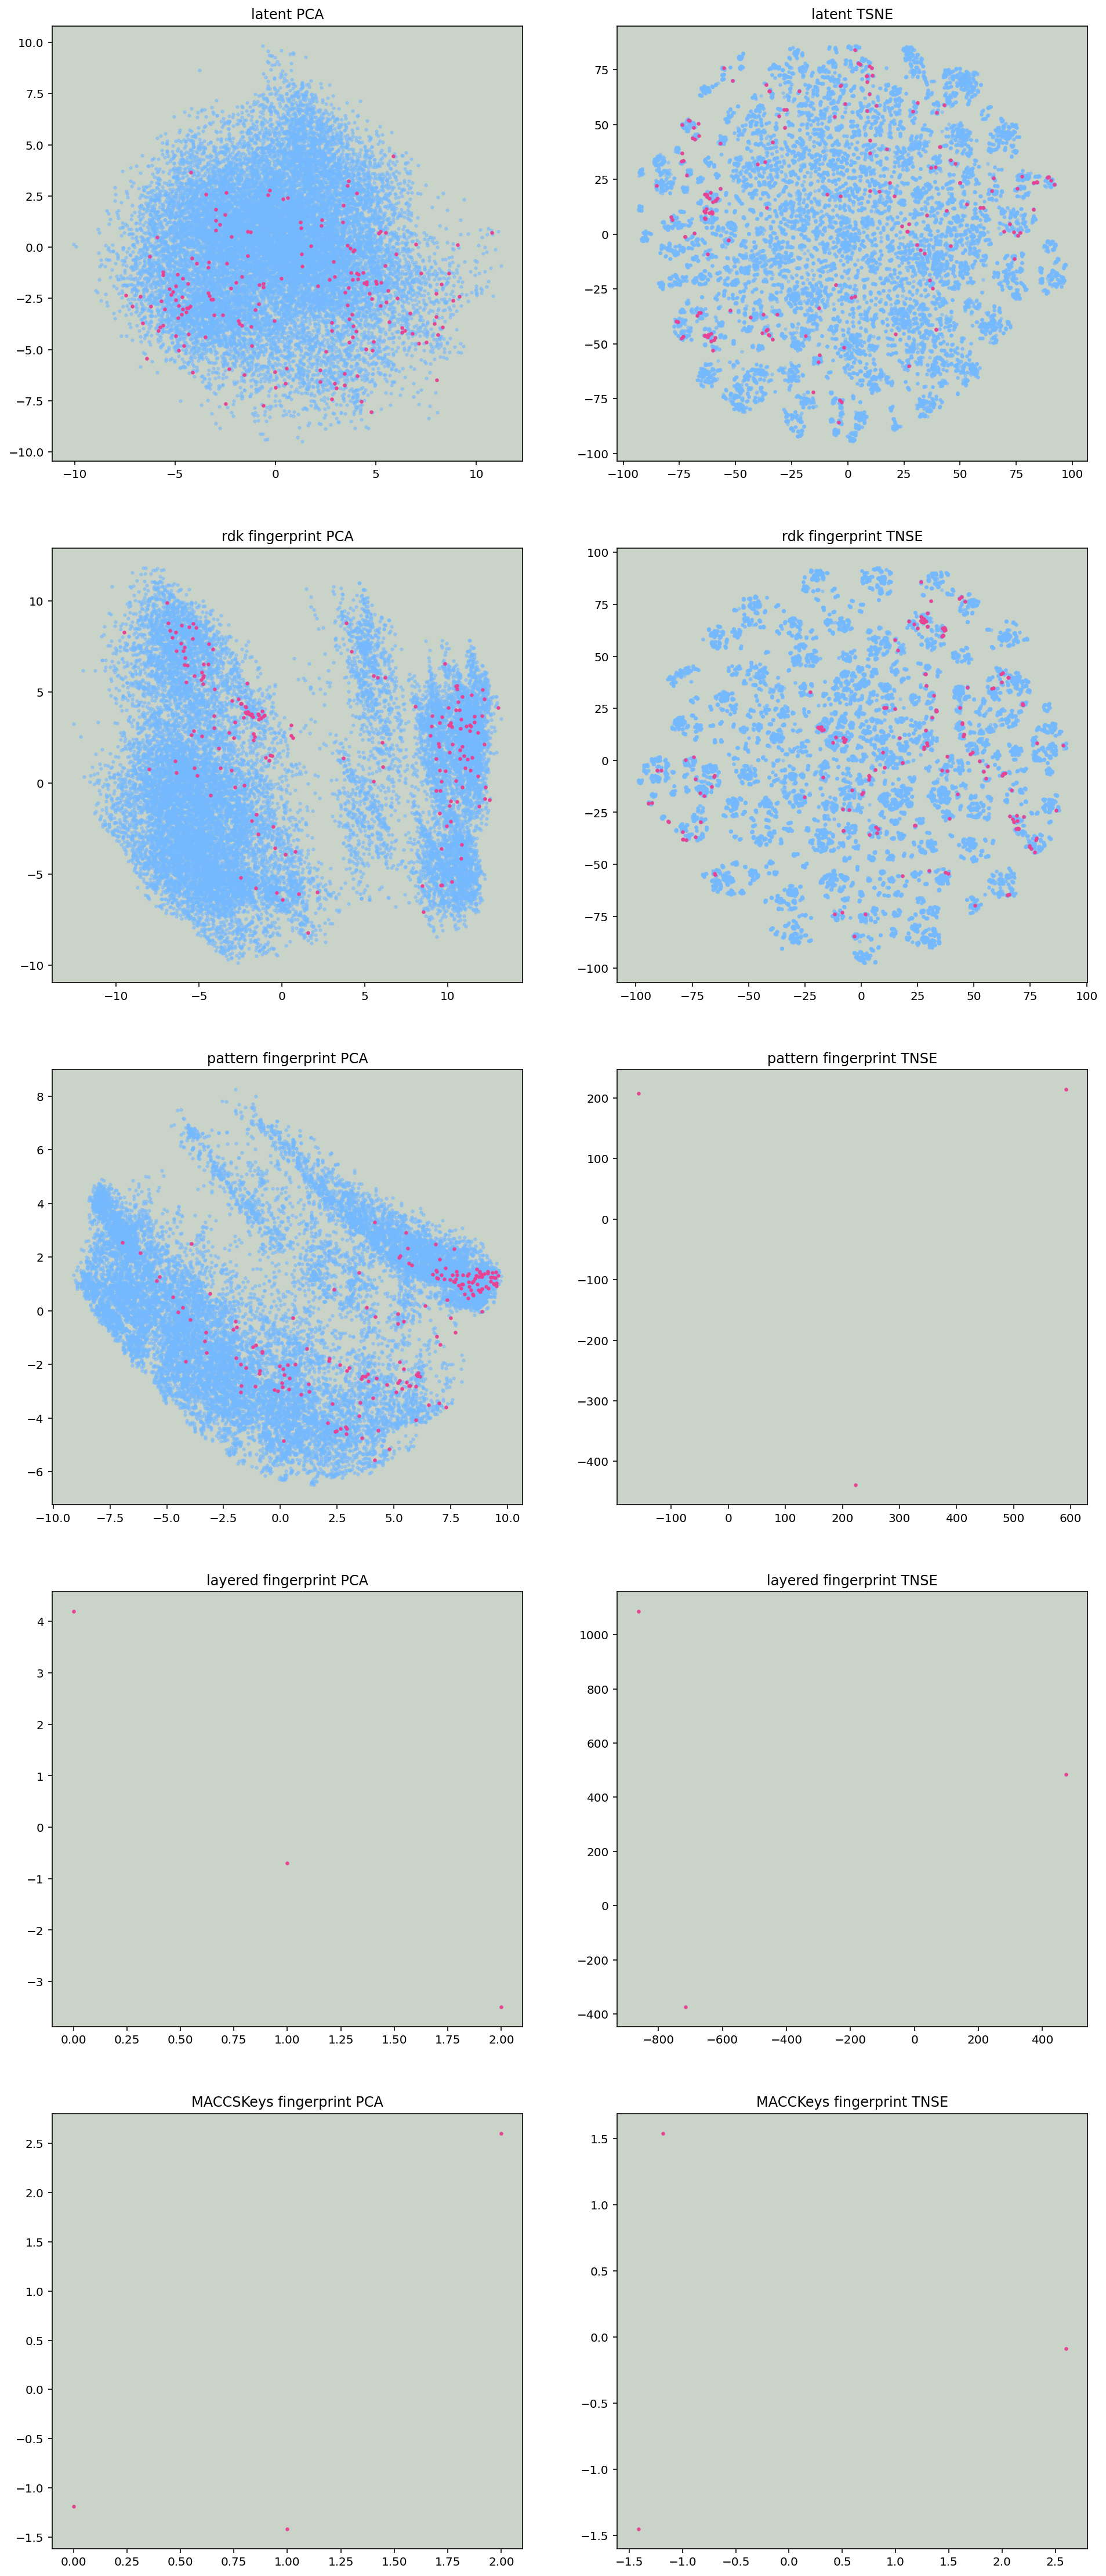

In [35]:
x1 = [ point[0] for point in points_latent_pca ]
y1 = [ point[1] for point in points_latent_pca ]

x2 = [ point[0] for point in points_latent_tsne ]
y2 = [ point[1] for point in points_latent_tsne ]

x3 = [ point[0] for point in points_rdk_fp_pca ]
y3 = [ point[1] for point in points_rdk_fp_pca ]

x4 = [ point[0] for point in points_rdk_fp_tsne ]
y4 = [ point[1] for point in points_rdk_fp_tsne ]

x5 = [ point[0] for point in points_pattern_fp_pca ]
y5 = [ point[1] for point in points_pattern_fp_pca ]

x6 = [ point[0] for point in points_pattern_fp_tsne ]
y6 = [ point[1] for point in points_pattern_fp_tsne ]

x7 = [ point[0] for point in points_layered_fp_pca ]
y7 = [ point[1] for point in points_layered_fp_pca ]

x8 = [ point[0] for point in points_layered_fp_tsne ]
y8 = [ point[1] for point in points_layered_fp_tsne ]

x9 = [ point[0] for point in points_MACCSKeys_fp_pca ]
y9 = [ point[1] for point in points_MACCSKeys_fp_pca ]

x10 = [ point[0] for point in points_MACCSKeys_fp_tsne ]
y10 = [ point[1] for point in points_MACCSKeys_fp_tsne ]

target = [ item[1] for item in latent_group ]
count = 0
for t in target:
    count += t

alpha1 = 1.0
alpha0 = 0.5
size1 = 5
size0 = 5
color1 = '#e84393'
color0 = '#74b9ff'
bg_color = '#CAD3C8'

cmap = plt.cm.get_cmap('cool', 2)

fig, ax = plt.subplots(1, 4)
fig.set_size_inches((16, 40))
plt.rcParams['axes.facecolor'] = bg_color

plt.subplot(521)
plt.scatter(x1[count:], y1[count:], c=color0, s=size0, alpha=alpha0)
plt.scatter(x1[:count], y1[:count], c=color1, s=size1, alpha=alpha1)
plt.title('latent PCA')

plt.subplot(522)
plt.scatter(x2[count:], y2[count:], c=color0, s=size0, alpha=alpha0)
plt.scatter(x2[:count], y2[:count], c=color1, s=size1, alpha=alpha1)
plt.title('latent TSNE')

plt.subplot(523)
plt.scatter(x3[count:], y3[count:], c=color0, s=size0, alpha=alpha0)
plt.scatter(x3[:count], y3[:count], c=color1, s=size1, alpha=alpha1)
plt.title('rdk fingerprint PCA')

plt.subplot(524)
plt.scatter(x4[count:], y4[count:], c=color0, s=size0, alpha=alpha0)
plt.scatter(x4[:count], y4[:count], c=color1, s=size1, alpha=alpha1)
plt.title('rdk fingerprint TNSE')

plt.subplot(525)
plt.scatter(x5[count:], y5[count:], c=color0, s=size0, alpha=alpha0)
plt.scatter(x5[:count], y5[:count], c=color1, s=size1, alpha=alpha1)
plt.title('pattern fingerprint PCA')

plt.subplot(526)
plt.scatter(x6[count:], y6[count:], c=color0, s=size0, alpha=alpha0)
plt.scatter(x6[:count], y6[:count], c=color1, s=size1, alpha=alpha1)
plt.title('pattern fingerprint TNSE')

plt.subplot(527)
plt.scatter(x7[count:], y7[count:], c=color0, s=size0, alpha=alpha0)
plt.scatter(x7[:count], y7[:count], c=color1, s=size1, alpha=alpha1)
plt.title('layered fingerprint PCA')

plt.subplot(528)
plt.scatter(x8[count:], y8[count:], c=color0, s=size0, alpha=alpha0)
plt.scatter(x8[:count], y8[:count], c=color1, s=size1, alpha=alpha1)
plt.title('layered fingerprint TNSE')

plt.subplot(529)
plt.scatter(x9[count:], y9[count:], c=color0, s=size0, alpha=alpha0)
plt.scatter(x9[:count], y9[:count], c=color1, s=size1, alpha=alpha1)
plt.title('MACCSKeys fingerprint PCA')

plt.subplot(5,2,10)
plt.scatter(x10[count:], y10[count:], c=color0, s=size0, alpha=alpha0)
plt.scatter(x10[:count], y10[:count], c=color1, s=size1, alpha=alpha1)
plt.title('MACCKeys fingerprint TNSE')

plt.show()